# POS 604: Polimetrics II
## Week 6: Multinomial data/ Multinomial models

There are two major categories of categorical outcomes with more than two possible outcomes:
* Ordered outcomes: Regime type=\{Democracy, anocracy, autocracy\}; education level=\{High school, undergraduate, Graduate \}
* Unordered outcomes: Religion=\{Protestant, Catholic, Islam, other \}; Trade agreement=\{ WTO, EU, ASEAN \}

In [1]:
## Loading stata kernel in jupyter notebook, using python code
import ipystata
from ipystata.config import config_stata
config_stata('C:\Program Files (x86)\Stata14\StataSE-64.exe') 

For this session, we learn about multinomial models by replicating one of Kathleen Gallagher Cunningham, titled [Understanding strategic choice The determinants of civil war and nonviolent campaign in self-determination disputes](http://journals.sagepub.com/doi/abs/10.1177/0022343313475467)

Read the abstract of the paper; what is the main argument of this paper?

In [2]:
%%stata
*Set the format of printed coeffients and p-values
set cformat %5.2f
set pformat %5.2f
*Load th data:
use "https://github.com/babakrezaee/MethodsCourses/blob/master/POS604_2018/Week6/JPR%20final.dta?raw=true", clear

Variable *strategic2* is the strategy choice of self-determination movements.

strategic2 is coded as follwo:
* 0 = conventional politics
* 1= nonviolent campaign
* 2= civil war
* 3= both civil war and nonviolent campaign.

Let's start with summarizing and plotting this variable:

In [5]:
%%stata
des strategic2 
display("***************************************************************************************************************")
sum strategic2 if active==1
display("***************************************************************************************************************")
tab strategic2 if active==1
display("***************************************************************************************************************")



              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------
strategic2      float   %9.0g                 0=conv. 1=nv 2=cw 1000 ever 3=both

*********************************************************************************************************
    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
  strategic2 |      3,897    .3297408    .7396242          0          3

*********************************************************************************************************
    0=conv. |
  1=nv 2=cw |
  1000 ever |
     3=both |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      3,232       82.94       82.94
          1 |         60        1.54       84.48
          2 |        590       15.14      

(bin=37, start=0, width=.08108108)



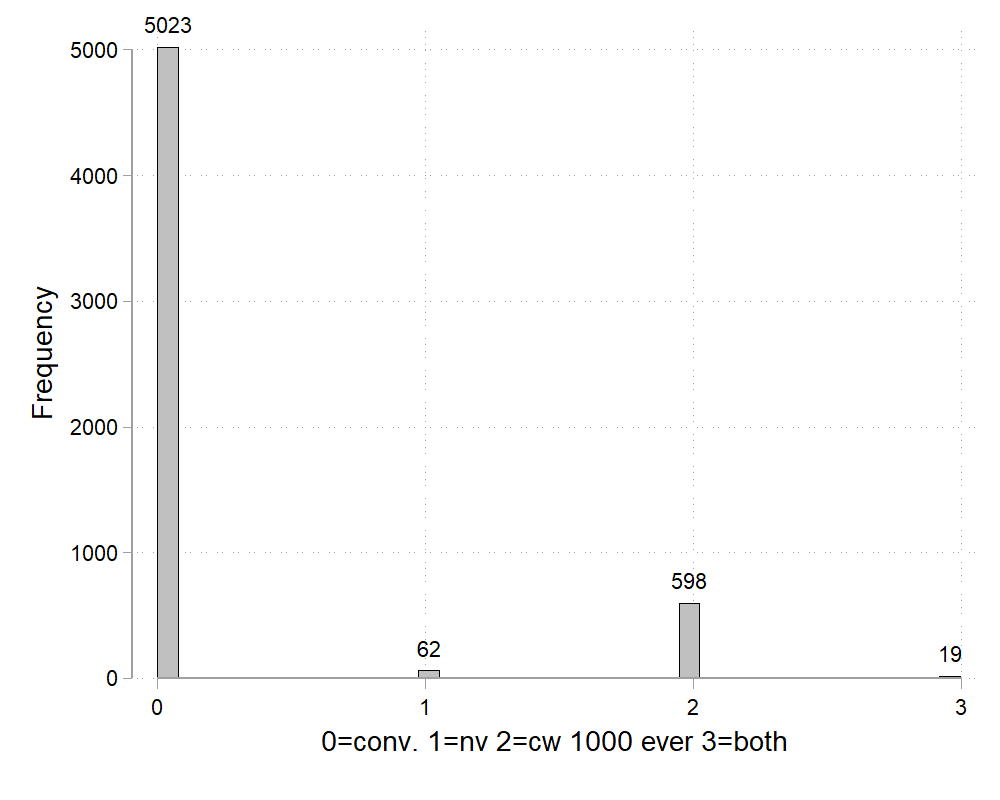

In [6]:
%%stata
hist strategic2, freq scheme(plotplain) addlabel 

This study investigates the effect of a set of variables on the stratgeic choice of self-detemrination movements between conventional politics and different types of contencious politics.
The list of regressors:
* democracy: regime type, dummy variable
* instab: Political instability is measured as a three or greater point change in the Polity score of the state in the past two years
* loggdppc: gross domestic product (GDP) per capita (log-transformed), proxy for state capacity
* logSDsize_relative: relative group population
* groupcon: geographic concentration
* kin: transnational kin, whether the SD group has kin in a nearby state.
* logfactions: measure of group fragmentation, which is a logged measure of the number of organizations making demands related to selfdetermination on behalf of the group each year.
* indep: independence demands
* excluded: political exclusion
* avgecdis: economic grievance, the average level of economic discrimination the group faces measuring less to more discrimination.
* logpop: population, log transformed
* last3years_nvcampaign
* last3years_civilwar1000

Formally, we want to estimate the below model:
$$strategic2=\alpha_0~democracy+\alpha_1~instab+\alpha_2~loggdppc+\alpha_3~logSDsize_relative+\alpha_4~groupcon+\alpha_5~kin+$$ 
$$\alpha_6~logfactions+\alpha_7~indep+\alpha_8~excluded+\alpha_9~avgecdis+\alpha_{10}~logpop+\alpha_{11}~last3years\_nvcampaign+\alpha_{12}~last3years\_civilwar1000+\epsilon$$

How do you estimate this model? Let's start with an OLD estimation:

In [7]:
%%stata
reg strategic2 i.democracy instab loggdppc logSDsize_relative groupcon kin   logfactions indep excluded avgecdis logpop  last3years_nvcampaign last3years_civilwar1000 if active==1, cluster(kgcid)

outreg2 using Cunningham_2013.xls, replace ctitle(OLS)

Linear regression                               Number of obs     =      2,300
                                                F(13, 88)         =      61.80
                                                Prob > F          =     0.0000
                                                R-squared         =     0.4200
                                                Root MSE          =     .62548

                                            (Std. Err. adjusted for 89 clusters in kgcid)
-----------------------------------------------------------------------------------------
                        |               Robust
             strategic2 |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
------------------------+----------------------------------------------------------------
            1.democracy |       0.06       0.10     0.59    0.56        -0.14        0.26
                 instab |      -0.06       0.05    -1.12    0.27        -0.17        0.05
               lo

(3,401 missing values generated)

(bin=33, start=-2.0693221, width=.14399991)



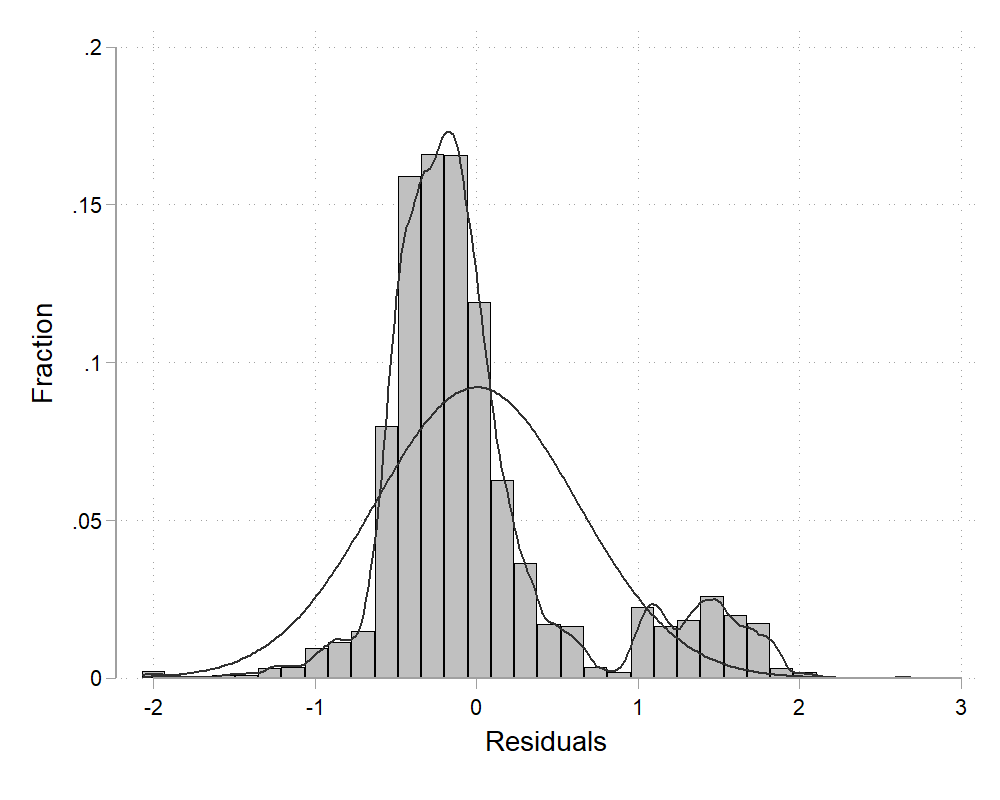

In [8]:
%%stata
predict e_hat, residuals
histogram e_hat, fraction normal kdensity scheme(plotplain)

(3,401 missing values generated)

(bin=33, start=-.67559952, width=.10522396)



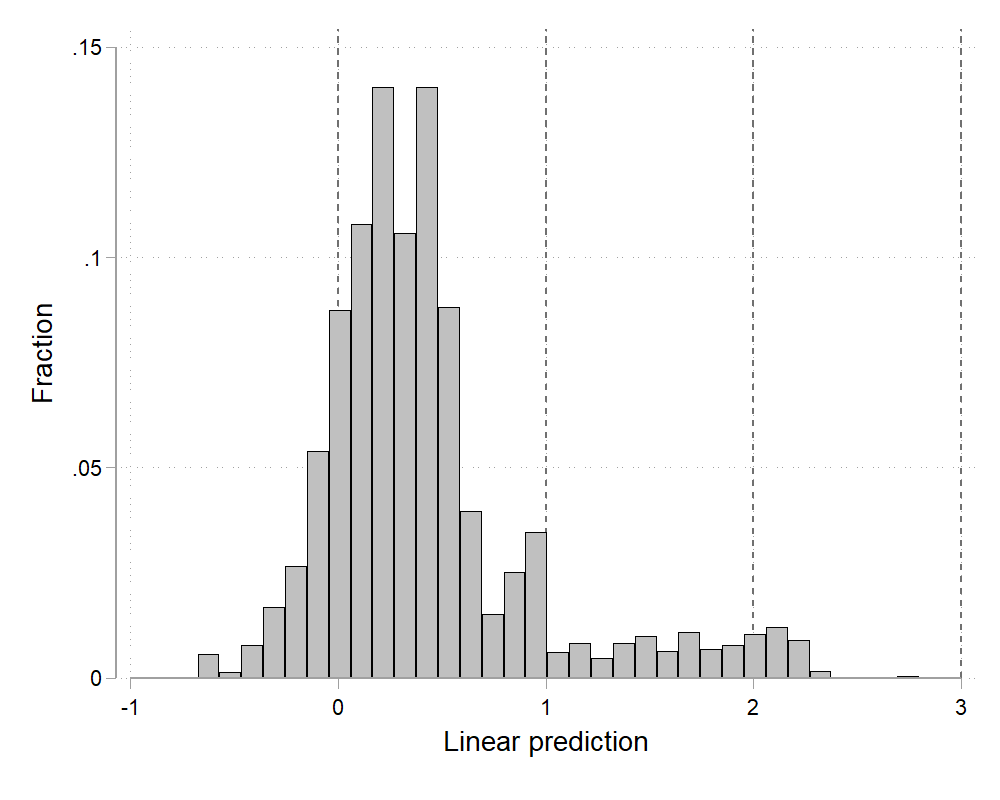

In [9]:
%%stata
predict y_hat, xb
histogram y_hat, fraction scheme(plotplain) xline(0 1 2 3)

Since the outcome variable is categorical, we expected to experience some issues after using OLS method for estimation our model. Previous sessions, logit and probit models were discussed in class for categorical outcomes with *exactly* two possible outcomes. Last session, you also learned about ordered logit model. Let's estimate above model using ordered logit estimation method:

In [10]:
%%stata
ologit strategic2  i.democracy instab loggdppc logSDsize_relative groupcon kin   logfactions indep excluded avgecdis logpop  last3years_nvcampaign last3years_civilwar1000 if active==1, cluster(kgcid) nolog


Ordered logistic regression                     Number of obs     =      2,300
                                                Wald chi2(13)     =     211.29
                                                Prob > chi2       =     0.0000
Log pseudolikelihood = -971.88131               Pseudo R2         =     0.3403

                                            (Std. Err. adjusted for 89 clusters in kgcid)
-----------------------------------------------------------------------------------------
                        |               Robust
             strategic2 |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------------+----------------------------------------------------------------
            1.democracy |       0.14       0.44     0.33    0.74        -0.72        1.01
                 instab |      -0.29       0.28    -1.04    0.30        -0.84        0.26
               loggdppc |      -0.40       0.17    -2.42    0.02        -0.73       -0.08
     l

These results mean,
$$
y=\begin{cases} 0~~~~if~~~~y^* \leq 1.85 \\ 1~~~~if~~~~1.85<y^* \leq 2.12 \\ 2~~~~if~~~~2.12<y^* \leq 7.64 \\  
3~~~~if~~~~7.64<y^*
\end{cases}
$$

------------------------------------------------------------------------------
### Math behind ordered logit and probit
The probability of a given observation for ordered logit is:

$$
p_{ij}=Pr(y_j=i)=Pr(k_{i-1}<X_j\beta+u\leq k_i)\\
~~~~~~=\frac{1}{1+exp(-k_i+X_j\beta)}-\frac{1}{1+exp(-k_{i-1}+X_j\beta)}\\
$$
$k_0$ is defined as $-\infty$ and $k_k$ as $+\infty$.

For ordered probit, the probability of a given observation is 

$$
p_{ij}=Pr(y_j=i)=Pr(k_{i-1}<X_j\beta+u\leq k_i)\\
~~~~~~=\Phi(k_i-X_j\beta)-\Phi(k_{i-1}-x_j\beta)
$$
where $\Phi(.)$ is the cdf of standard normal distribution.


------------------------------------------------------------------------------

Here, we make a critical assumption. Using ologit/oprobit, it is assumed that the association between each pair of outcome groups is the same, know as *proportional odds assumption*. We can brant test to evaluate this assumnption.

In [11]:
%%stata
brant

not all independent variables can be retained in binary logits
brant test cannot be computed
r(9993);



(bin=37, start=0, width=.05405405)



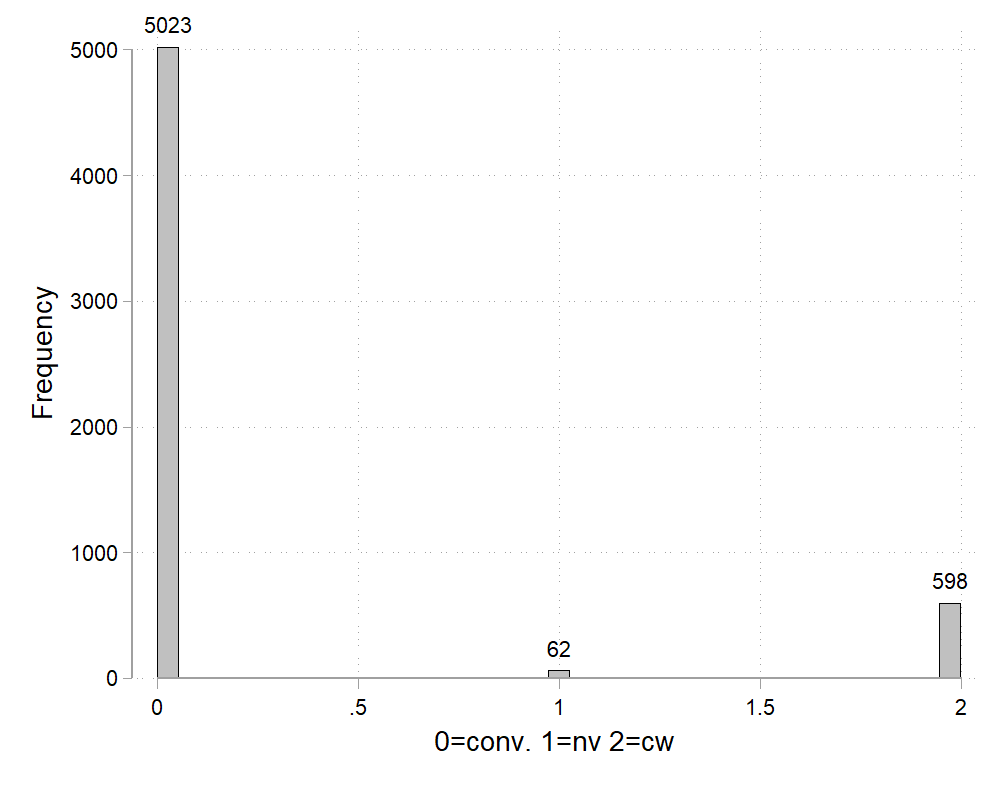

In [12]:
%%stata
hist strategic3, freq scheme(plotplain) addlabel 

In [13]:
%%stata
ologit strategic3  i.democracy instab loggdppc logSDsize_relative groupcon kin   logfactions indep excluded avgecdis logpop  last3years_nvcampaign last3years_civilwar1000 if active==1, cluster(kgcid) nolog


Ordered logistic regression                     Number of obs     =      2,285
                                                Wald chi2(13)     =     192.27
                                                Prob > chi2       =     0.0000
Log pseudolikelihood = -891.63117               Pseudo R2         =     0.3552

                                            (Std. Err. adjusted for 89 clusters in kgcid)
-----------------------------------------------------------------------------------------
                        |               Robust
             strategic3 |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------------+----------------------------------------------------------------
            1.democracy |       0.18       0.46     0.38    0.70        -0.72        1.07
                 instab |      -0.22       0.29    -0.76    0.45        -0.78        0.34
               loggdppc |      -0.43       0.17    -2.50    0.01        -0.77       -0.09
     l

In [14]:
%%stata
brant


Brant test of parallel regression assumption

                          |       chi2     p>chi2      df
 -------------------------+------------------------------
                      All |     323.40      0.000      13
 -------------------------+------------------------------
              1.democracy |       7.37      0.007       1
                   instab |       2.17      0.141       1
                 loggdppc |       1.19      0.276       1
       logSDsize_relative |      12.44      0.000       1
                groupcon2 |       1.43      0.232       1
                      kin |       1.38      0.240       1
              logfactions |      16.67      0.000       1
        independencedummy |       0.77      0.380       1
                 excluded |       0.61      0.435       1
                 avgecdis |       3.90      0.048       1
                   logpop |       9.06      0.003       1
    last3years_nvcampaign |      77.58      0.000       1
  last3years_civilwar1000

One implication of the violation of proportional odds assumption is that $p_{ik} \neq p_{ik+1}$ that is $ x_i\beta_k \neq x_i\beta_{k+1}$ for at least one $k$.

#### ------------------------------------------------------------------------------
### Math behind multinomial logit

For the sake of simplicity, assume there are three categorical outcomes.
The probability of a given observation for ordered logit is:

$$
ln\frac{Pr(Y_i=1)}{Pr(Y_i=3)}=\beta_1.X_i \\
ln\frac{Pr(Y_i=2)}{Pr(Y_i=3)}=\beta_2.X_i  
$$

Then,
$$
Pr(Y_i=1)=Pr(Y_i=3)e^{\beta_1.X_i} \\
Pr(Y_i=2)=Pr(Y_i=3)e^{\beta_2.X_i} \\
Pr(Y_i=3)=1-Pr(Y_i=1)-Pr(Y_i=2)
$$

We can show that,

$$
Pr(Y_i=1)=\frac{e^{\beta_1.X_i}}{e^{\beta_1.X_i}+e^{\beta_2.X_i}+e^{\beta_3.X_i}} \\
Pr(Y_i=2)=\frac{e^{\beta_2.X_i}}{e^{\beta_1.X_i}+e^{\beta_2.X_i}+e^{\beta_3.X_i}} \\
Pr(Y_i=3)=\frac{e^{\beta_3.X_i}}{e^{\beta_1.X_i}+e^{\beta_2.X_i}+e^{\beta_3.X_i}}
$$

(You easily extend above math to an outcome with k unordered categorical variable.)


We need to estimate above equations. However, there is a problem here. By estimating $\beta_1$, $\beta_2$, and $\beta_3$, the model is unidentified. Why?

To resolve this issue, we can arbitrarily set one of $\beta_1$, $\beta_2$, and $\beta_3$ to zero. Above probabilities, therefore, can be re-written as follow:
$$
Pr(Y_i=1)=\frac{1}{1+e^{\beta_2.X_i}+e^{\beta_3.X_i}} \\
Pr(Y_i=2)=\frac{e^{\beta_2.X_i}}{1+e^{\beta_2.X_i}+e^{\beta_3.X_i}} \\
Pr(Y_i=3)=\frac{e^{\beta_3.X_i}}{1+e^{\beta_2.X_i}+e^{\beta_3.X_i}}
$$

In fact, given this normalization, you will find the prbability of outcome 2 and 3 relative to the probability of outcome 1, as your base outcome.
#### ------------------------------------------------------------------------------

In [15]:
%%stata
mlogit strategic2  democracy instab loggdppc logSDsize_relative groupcon kin   logfactions indep excluded avgecdis logpop  last3years_nvcampaign last3years_civilwar1000 if active==1, cluster(kgcid) nolog

Multinomial logistic regression                 Number of obs     =      2,300
                                                Wald chi2(38)     =          .
                                                Prob > chi2       =          .
Log pseudolikelihood = -730.46071               Pseudo R2         =     0.5042

                                            (Std. Err. adjusted for 89 clusters in kgcid)
-----------------------------------------------------------------------------------------
                        |               Robust
             strategic2 |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------------+----------------------------------------------------------------
0                       |  (base outcome)
------------------------+----------------------------------------------------------------
1                       |
              democracy |      -1.54       0.58    -2.66    0.01        -2.67       -0.40
                 instab |   

We can change the baseline probability in STATA by adding *base(outcome=0,1,2,...)* as an option to the mlogit estimation:

In [16]:
%%stata
mlogit strategic2  democracy instab loggdppc logSDsize_relative groupcon kin   logfactions indep excluded avgecdis logpop  last3years_nvcampaign last3years_civilwar1000 if active==1, cluster(kgcid) base(3) nolog

Multinomial logistic regression                 Number of obs     =      2,300
                                                Wald chi2(26)     =          .
                                                Prob > chi2       =          .
Log pseudolikelihood = -730.46071               Pseudo R2         =     0.5042

                                            (Std. Err. adjusted for 89 clusters in kgcid)
-----------------------------------------------------------------------------------------
                        |               Robust
             strategic2 |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
------------------------+----------------------------------------------------------------
0                       |
              democracy |       1.56       0.60     2.60    0.01         0.39        2.74
                 instab |      15.07       1.01    14.85    0.00        13.08       17.06
               loggdppc |       0.44       0.31     1.44    0.15      

  Variables that uniquely identify margins: loggdppc _outcome



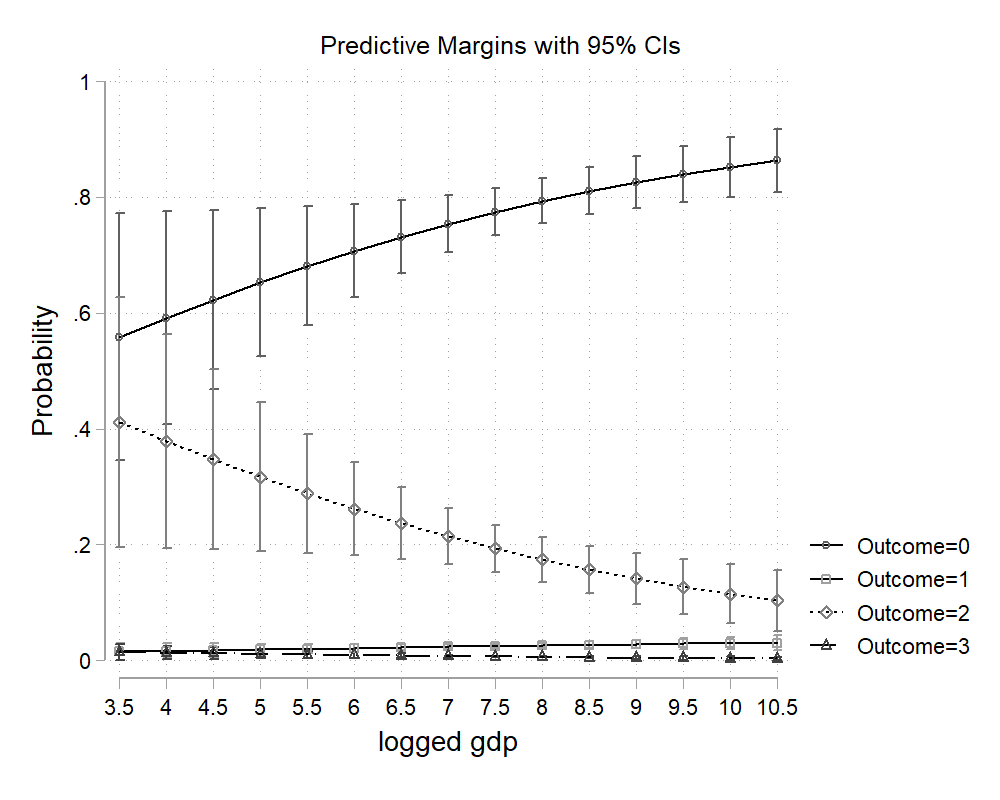

In [18]:
%%stata
quietly mlogit strategic2  democracy instab loggdppc logSDsize_relative groupcon kin   logfactions indep excluded avgecdis logpop  last3years_nvcampaign last3years_civilwar1000 if active==1, cluster(kgcid)
quietly margins, at( loggdppc =(3.5(.5)10.5))
marginsplot, scheme(plotplain)

## Independence of Irrelevant Alternatives/ Binary Independence/ Independence Axiom

This is a famous concept in choice theory, see [here](https://github.com/babakrezaee/MethodsCourses/blob/master/POS604_2018/Week6/IIA_Kevin%20Roberts.pdf). 

The intuition behind this assumption is straighforward. An individual's decision between options $x$ and $y$ is independent from option $z$. In othwer words, an individual's ranking of $x$ and $y$ should not change if we introduce option z.

In our example, it is assumed that a self-determination group's ranking of nonviolent resitance and civil war will not be affected if we allow them to participate in conventional politics. What do you think? Is it a reasonable assumption? Can you offer a strategy to intuitively evaluate this assumption?

see [here](https://statisticalhorizons.com/iia), for a discussion of IIA in statistical analysis. . 